In [7]:
import torch
import random
import numpy as np
from sklearn.model_selection import train_test_split
import torchvision.datasets as data

### MNIST with Fully Connected NeuralNet 

In [72]:
def fix_seed():
    random.seed(0)
    np.random.seed(0)
    torch.cuda.manual_seed(0)
    torch.backends.cudnn.determenistic=True
    return True

In [73]:
fix_seed()

True

In [111]:
train_data=data.MNIST('./', download=True, train=True)
test_data=data.MNIST('./', download=True, train=False)

In [112]:
X_train, X_test=train_data.train_data.float(), test_data.test_data.float()
y_train, y_test=train_data.targets, test_data.targets

/Users/macbook/miniconda3/envs/torch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/macbook/miniconda3/envs/torch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

In [114]:
X_train.dtype, X_test.dtype

(torch.float32, torch.float32)

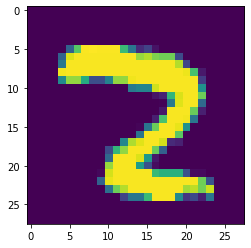

tensor(2)


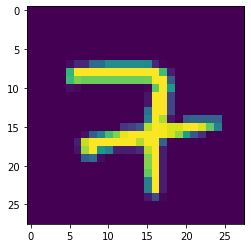

tensor(7)


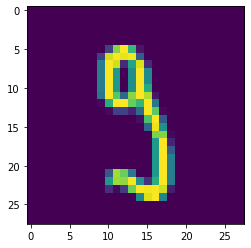

tensor(9)


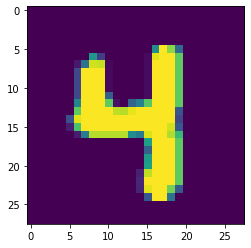

tensor(4)


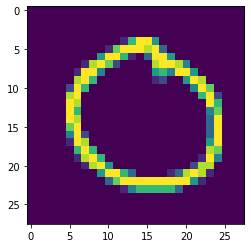

tensor(0)


In [116]:
#Plot few images
import matplotlib.pyplot as plt
from random import choice

index = choice(X_train.size())

for _ in range(5):    
    plt.imshow(X_train[index, :, :])
    plt.show()
    print(y_train[index])
    index += 10

In [117]:
#Reshape our data
print(X_train.shape, X_test.shape)

X_train=X_train.reshape([-1, 28*28])
X_test=X_test.reshape([-1, 28*28])

print(X_train.shape, X_test.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([60000, 784]) torch.Size([10000, 784])


In [125]:
#Define MNIST_Neural_Net
class Mnist(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(Mnist, self).__init__() 
        self.full_connected_1=torch.nn.Linear(28*28, n_hidden_neurons)
        self.activation_1=torch.nn.Sigmoid()
        self.full_connected_2=torch.nn.Linear(n_hidden_neurons, 10)
        
    def forward(self, x):
        x=self.full_connected_1(x)
        x=self.activation_1(x)
        x=self.full_connected_2(x)
        return x

In [126]:
mnist = Mnist(5)

In [127]:
mnist

Mnist(
  (full_connected_1): Linear(in_features=784, out_features=5, bias=True)
  (activation_1): Sigmoid()
  (full_connected_2): Linear(in_features=5, out_features=10, bias=True)
)

In [128]:
#Loss and Optimizer
optimizer=torch.optim.Adam(mnist.parameters(), lr=1.0e-3)
loss=torch.nn.CrossEntropyLoss()

In [129]:
#Check reshaping
# X_train.reshape(-1).shape
# X_train.reshape(-1,1,1).shape
# X_train.reshape(len(X_train[1]),len(X_train),len(X_train[2])).shape
# #X_train.reshape(-1,9).shape
# X_train.reshape(-1,14,32,7).shape
# X_train.shape

tensor(0.8359)
tensor(0.8360)
tensor(0.8308)
tensor(0.8309)
tensor(0.8232)
tensor(0.8336)
tensor(0.8362)
tensor(0.8325)
tensor(0.8133)
tensor(0.8273)
tensor(0.8262)
tensor(0.8274)
tensor(0.8214)
tensor(0.8288)
tensor(0.8230)
tensor(0.8171)
tensor(0.8317)
tensor(0.8279)
tensor(0.8298)
tensor(0.8259)
tensor(0.8221)
tensor(0.8314)
tensor(0.8367)
tensor(0.8330)
tensor(0.8231)
tensor(0.8223)
tensor(0.7880)
tensor(0.8212)
tensor(0.8282)
tensor(0.8212)
tensor(0.8284)
tensor(0.8246)
tensor(0.8237)
tensor(0.8265)
tensor(0.8204)
tensor(0.8220)
tensor(0.8288)
tensor(0.8232)
tensor(0.8105)
tensor(0.8311)
tensor(0.8300)
tensor(0.8297)
tensor(0.8320)
tensor(0.8197)
tensor(0.8288)
tensor(0.8220)
tensor(0.8322)
tensor(0.8339)
tensor(0.8319)
tensor(0.8321)
tensor(0.8384)
tensor(0.8307)
tensor(0.8394)
tensor(0.8402)
tensor(0.8356)
tensor(0.8224)
tensor(0.8336)
tensor(0.8407)
tensor(0.8185)
tensor(0.8334)
tensor(0.8304)
tensor(0.8283)
tensor(0.8303)
tensor(0.8391)
tensor(0.8360)
tensor(0.8031)
tensor(0.8

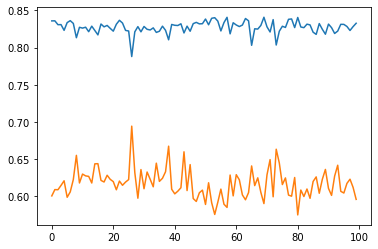

In [133]:
#Fitting process
batch_size = 10
test_loss_history, test_accuracy_history = [], []

for epoch in range(100):
    order=np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes=order[start_index:start_index+batch_size]
        
        X_batch=X_train[batch_indexes]
        y_batch=y_train[batch_indexes]
        
        predictions=mnist.forward(X_batch)
        loss_value=loss(predictions, y_batch)
        loss_value.backward()
        optimizer.step()
        
#     if epoch % 100 == 0:
#         predictions=mnist.forward(X_test)
#         print((predictions.argmax(dim=1) == y_test).float().mean())

    test_preds = mnist.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)


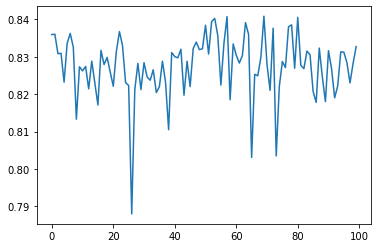

In [138]:
plt.plot(test_accuracy_history);

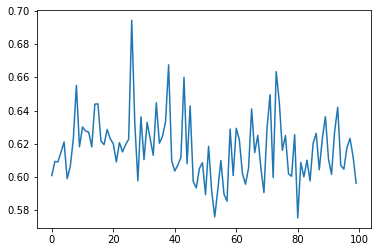

In [137]:
plt.plot(test_loss_history);   

In [161]:
#1*2
x = torch.tensor([
        [10., 20.]
    ])

#3*2 <--> after torch.transponse() we'll get 2*3
w = torch.tensor([
    [11., 12.],
    [21., 22.],
    [31., 32]
])

#1*3
b = torch.tensor([
    [31., 32., 33.]
])

print(x.shape, w.shape, b.shape)

torch.Size([1, 2]) torch.Size([3, 2]) torch.Size([1, 3])


In [166]:
#Check the matrix multiplication
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative =  torch.mm(x, fc.weight.data.transpose(0,1)) + fc.biases.data # x * w^T + b

# Проверка осуществляется автоматически вызовом функции
print(fc_out == fc_out_alternative)